In [3]:
import tensorflow as tf 
from tensorflow.keras import backend as K

In [2]:
from tensorflow.keras.layers import Lambda 

In [7]:
def relu(x):
    return K.maximum(0.0, x)

In [8]:
lamba_layer = Lambda(relu)

In [9]:
lam_layer = Lambda(lambda x: tf.abs(x))

In [10]:
mnist = tf.keras.datasets.mnist

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0



Epoch 1/10


1875/1875 [==============================] - 10s 4ms/step - loss: 0.2196 - accuracy: 0.9380
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0915 - accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0639 - accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0502 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0383 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0317 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0257 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0

[0.09707663208246231, 0.9754999876022339]

In [18]:

model = Sequential([
    Flatten(input_shape =(28, 28)),
    Dense(128),
    Lambda(lambda x: tf.abs(x)),
    Dense(10, activation = 'softmax')
    
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
    )


In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 lambda_7 (Lambda)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
from tensorflow.keras.utils import plot_model

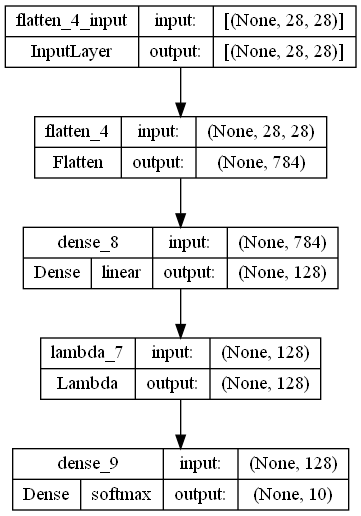

In [22]:
plot_model(model, show_layer_activations=True, show_shapes=True)

In [ ]:

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

In [ ]:
model.summary

In [15]:

model = Sequential([
    Flatten(input_shape =(28, 28)),
    Dense(128),
    Lambda(relu),
    Dense(10, activation = 'softmax')
    
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
    )

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 24s 11ms/step - loss: 0.2613 - accuracy: 0.9248
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1141 - accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0780 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0592 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0459 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0358 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0291 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0203 - accuracy: 0.9935
Epoch 10/10
313/313 [==============================] - 3s 7ms/st

[0.08791997283697128, 0.9768000245094299]

The Class "Layer"

In [113]:
from tensorflow.keras.layers import Layer

In [122]:
class SimpleDense(Layer):
    def __init__(self, units=32):
        super(SimpleDense, self).__init__()
        self.units = units
    
    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name='kernel',
                             initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                             trainable=True)
        
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name='bias',
                             initial_value=b_init(shape=(self.units,), dtype='float32'),
                             trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [123]:
# declare an instance of the class
my_dense = SimpleDense(units=1)

# define an input and feed into the layer
x = tf.ones((1, 1))
y = my_dense(x)

# parameters of the base Layer class like `variables` can be used
print(my_dense.variables)

[<tf.Variable 'simple_dense_14/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.06174079]], dtype=float32)>, <tf.Variable 'simple_dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [124]:
import numpy as np
x = np.array([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = 2.0*x - 1.0
y = np.array(y, dtype=float)

In [125]:
model = tf.keras.Sequential([Input(shape=(1)), SimpleDense(units=1)])
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, epochs=500)

print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 1s 535ms/step - loss: 20.5086
Epoch 2/500
1/1 [==============================] - 0s 29ms/step - loss: 16.4433
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 13.2221
Epoch 4/500
1/1 [==============================] - 0s 17ms/step - loss: 10.6684
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 8.6422
Epoch 6/500
1/1 [==============================] - 0s 18ms/step - loss: 7.0333
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 5.7544
Epoch 8/500
1/1 [==============================] - 0s 14ms/step - loss: 4.7364
Epoch 9/500
1/1 [==============================] - 0s 28ms/step - loss: 3.9250
Epoch 10/500
1/1 [==============================] - 0s 14ms/step - loss: 3.2771
Epoch 11/500
1/1 [==============================] - 0s 34ms/step - loss: 2.7585
Epoch 12/500
1/1 [==============================] - 0s 13ms/step - loss: 2.3424
Epoch 13/500
1/1 [===========================

In [126]:
for weight in model.weights:
    print(weight)

<tf.Variable 'simple_dense_15/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9999906]], dtype=float32)>
<tf.Variable 'simple_dense_15/bias:0' shape=(1,) dtype=float32, numpy=array([-0.99991345], dtype=float32)>


Custom Layers with activation

In [127]:
class SimpleDense(Layer):
    def __init__(self, units=32, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)
    
    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name='kernel',
                             initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                             trainable=True)
        
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name='bias',
                             initial_value=b_init(shape=(self.units,), dtype='float32'),
                             trainable=True)
        
    def call(self, inputs):
        return self.activation(tf.matmul(inputs, self.w) + self.b)

In [129]:
model = tf.keras.Sequential([Input(shape=(1)), SimpleDense(units=1, activation='relu'), SimpleDense(units=1)])
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, epochs=500)

print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 20.9817
Epoch 2/500
1/1 [==============================] - 0s 19ms/step - loss: 20.9773
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 20.9721
Epoch 4/500
1/1 [==============================] - 0s 37ms/step - loss: 20.9661
Epoch 5/500
1/1 [==============================] - 0s 26ms/step - loss: 20.9589
Epoch 6/500
1/1 [==============================] - 0s 43ms/step - loss: 20.9505
Epoch 7/500
1/1 [==============================] - 0s 38ms/step - loss: 20.9404
Epoch 8/500
1/1 [==============================] - 0s 25ms/step - loss: 20.9285
Epoch 9/500
1/1 [==============================] - 0s 28ms/step - loss: 20.9143
Epoch 10/500
1/1 [==============================] - 0s 29ms/step - loss: 20.8973
Epoch 11/500
1/1 [==============================] - 0s 23ms/step - loss: 20.8772
Epoch 12/500
1/1 [==============================] - 0s 23ms/step - loss: 20.8531
Epoch 13/500
1/1 [=====================

In [130]:

class SimpleQuadratic(Layer):

    def __init__(self, units=32, activation=None):
        '''Initializes the class and sets up the internal variables'''
        super(SimpleQuadratic, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)
    
    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        a_init = tf.random_normal_initializer()
        self.a = tf.Variable(name="kernel1", initial_value=a_init(shape = (input_shape[-1], self.units) ,dtype='float32'), trainable=True)
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(name="kernel2", initial_value=b_init(shape = (input_shape[-1], self.units) ,dtype='float32'), trainable=True)
        c_init = tf.zeros_initializer()
        self.c = tf.Variable(name="bias", initial_value=c_init(shape = (self.units,) ,dtype='float32'), trainable=True)
        
   
    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        return self.activation(tf.matmul(tf.math.square(inputs), self.a) + tf.matmul(inputs, self.b) + self.c)

In [131]:
import numpy as np
x = np.array([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = 2.0*tf.square(x) + 2.0*x - 1.0
y = np.array(y, dtype=float)

In [133]:
model = tf.keras.Sequential([Input(shape=(1)), SimpleQuadratic(units=1)])
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, epochs=500)

print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 289.9697
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 19.8925
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 10.6232
Epoch 4/500
1/1 [==============================] - 0s 29ms/step - loss: 8.7777
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 7.3959
Epoch 6/500
1/1 [==============================] - 0s 22ms/step - loss: 6.2449
Epoch 7/500
1/1 [==============================] - 0s 49ms/step - loss: 5.2824
Epoch 8/500
1/1 [==============================] - 0s 73ms/step - loss: 4.4774
Epoch 9/500
1/1 [==============================] - 0s 55ms/step - loss: 3.8038
Epoch 10/500
1/1 [==============================] - 0s 73ms/step - loss: 3.2402
Epoch 11/500
1/1 [==============================] - 0s 18ms/step - loss: 2.7682
Epoch 12/500
1/1 [==============================] - 0s 20ms/step - loss: 2.3730
Epoch 13/500
1/1 [=============================